In [1]:
import scvi
import scrnatools as rna
import scanpy as sc
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

In [2]:
sns.set_context("paper")
sc.set_figure_params(figsize=(4,4), dpi=80, dpi_save=300, facecolor="white", frameon=False)
plt.rcParams["axes.grid"] = False

Data paths

In [3]:
rawDataPath = "/mnt/iacchus/joe/raw_data/"
processedDataPath = "/mnt/iacchus/joe/processed_data/"

In [4]:
# rawDataPath = "/mnt/e/Archive/Joe/raw_data/"
# processedDataPath = "/mnt/e/Archive/Joe/processed_data/"

In [5]:
adata = sc.read(f"{processedDataPath}/Fezf2_thymus_paper/h5ad_files/combined_all_genes_TECs.h5ad")
model = scvi.model.SCVI.load(f"{processedDataPath}/Fezf2_thymus_paper/scVI_models/combined_all_genes", adata=adata)

INFO     File /mnt/iacchus/joe/processed_data//Fezf2_thymus_paper/scVI_models/combined_all_genes/model.pt already  
         downloaded                                                                                                


No GPU/TPU found, falling back to CPU. (Set TF_CPP_MIN_LOG_LEVEL=0 and rerun for more info.)


In [54]:
exprs = pd.DataFrame(adata[adata.obs.majority_voting == "Aire-stage"].layers["log1p"].todense(), index=adata[adata.obs.majority_voting == "Aire-stage"].obs_names)
exprs["cell_type"] = adata[adata.obs.majority_voting == "Aire-stage"].obs.genotype
exprs = exprs.groupby("cell_type").mean()

In [55]:
exprs

,0,1,2,3,4,5,6,7,8,9,...,18233,18234,18235,18236,18237,18238,18239,18240,18241,18242
cell_type,,,,,,,,,,,,,,,,,,,,,
Aire_KO,0.611840,0.012845,0.000101,0.323816,0.163376,0.876702,0.698106,0.463870,0.000086,0.001005,...,1.110486,3.755031,3.618949,1.471931,1.761439,2.878015,1.819773,0.555744,3.299027,0.086582
Fezf2_KO,0.317629,0.016426,0.000268,0.373591,0.172917,0.613754,0.272711,0.383577,0.000000,0.005744,...,0.826047,4.074421,3.781441,1.480969,1.566091,3.038392,1.596055,0.283584,3.666684,0.032814
WT,0.545242,0.031362,0.001355,0.350753,0.194504,0.785384,0.404107,0.463474,0.002966,0.003624,...,1.494285,4.010921,3.832935,1.873735,2.088684,3.190098,2.088460,0.600002,3.601355,0.045338


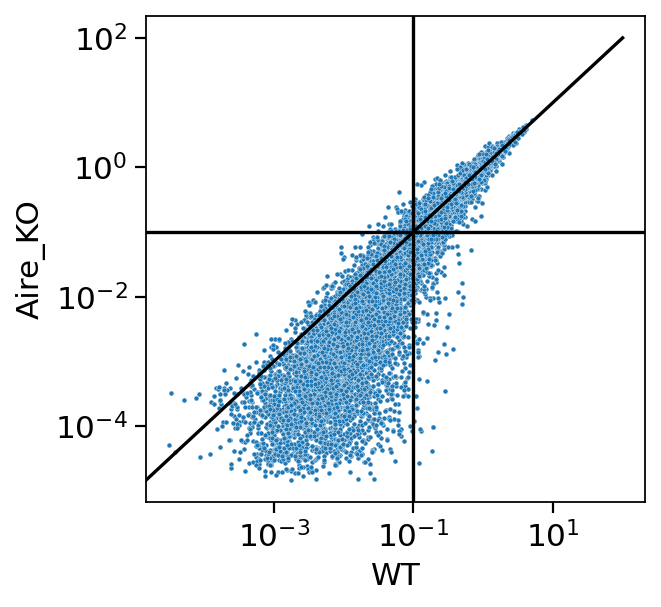

In [56]:
sns.scatterplot(exprs.T, x="WT", y="Aire_KO", s=5) 
plt.plot([0,100],[0,100], c="black")
plt.axhline(y=0.1, c="black")
plt.axvline(x=0.1, c="black")
plt.xscale("log")
plt.yscale("log")
plt.show()

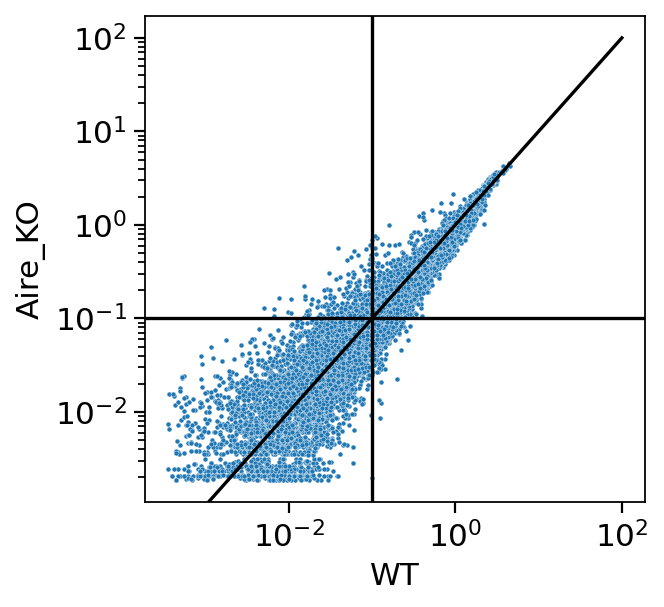

In [53]:
sns.scatterplot(exprs.T, x="WT", y="Aire_KO", s=5) 
plt.plot([0,100],[0,100], c="black")
plt.axhline(y=0.1, c="black")
plt.axvline(x=0.1, c="black")
plt.xscale("log")
plt.yscale("log")
plt.show()

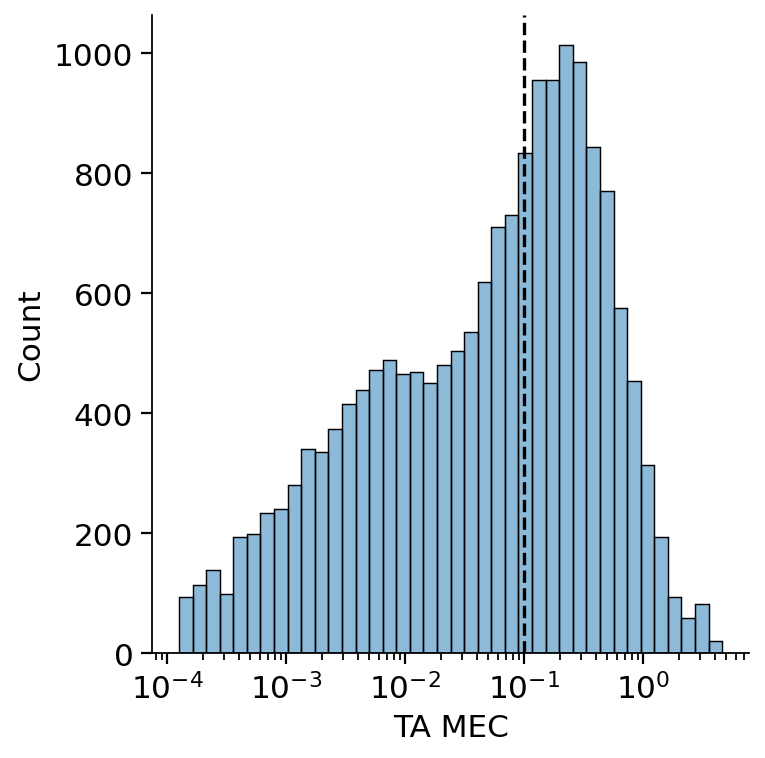

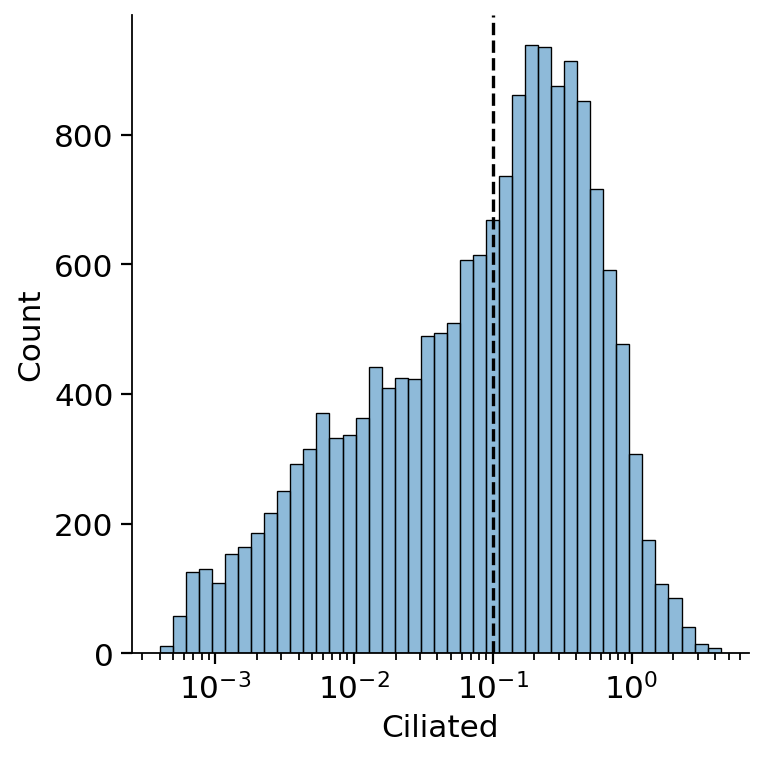

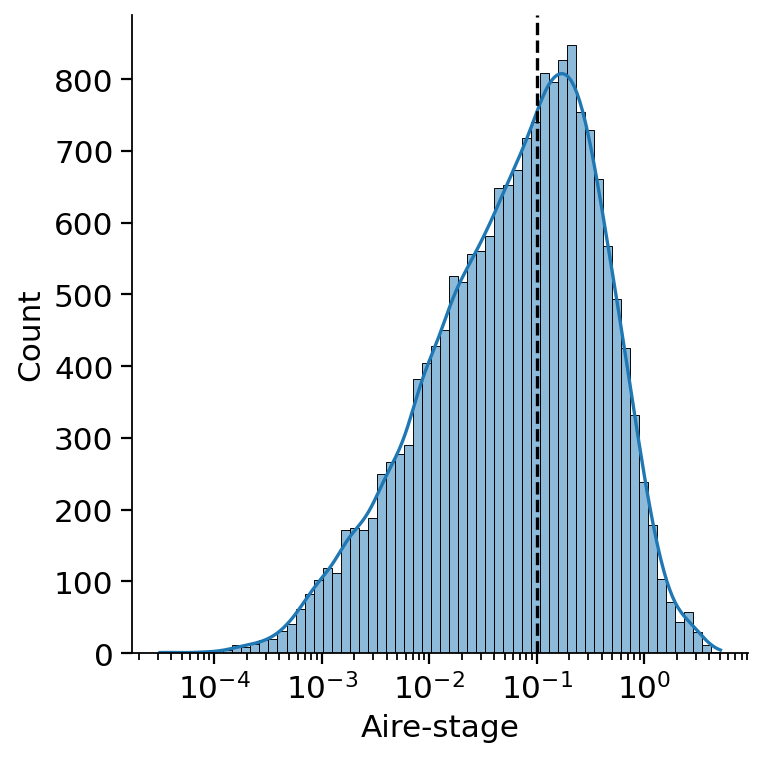

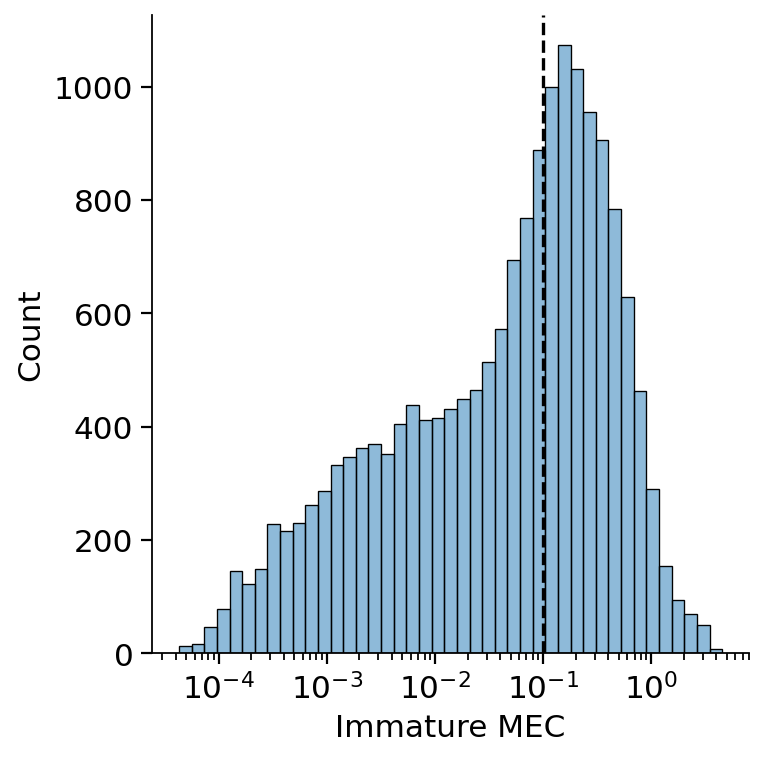

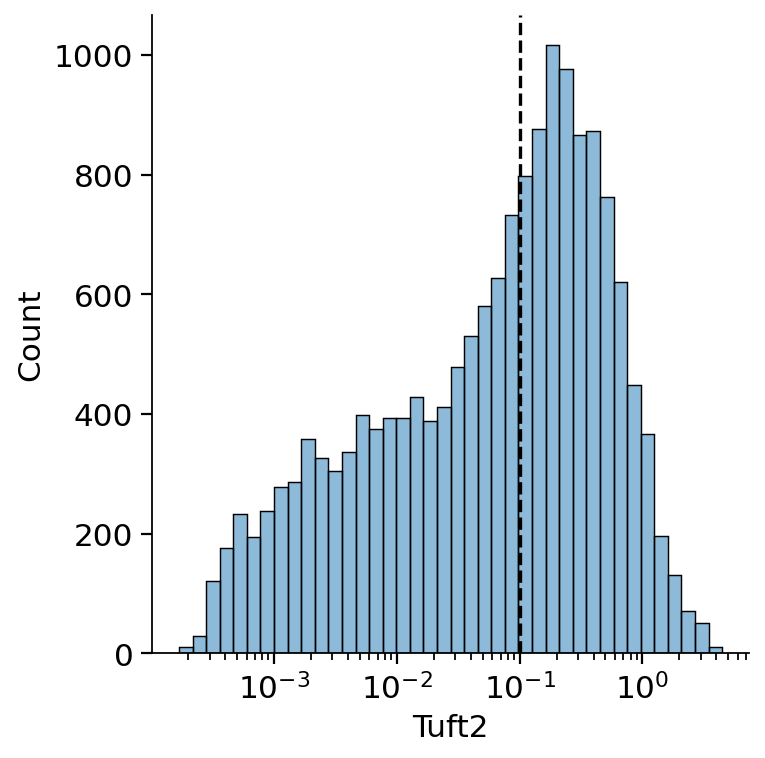

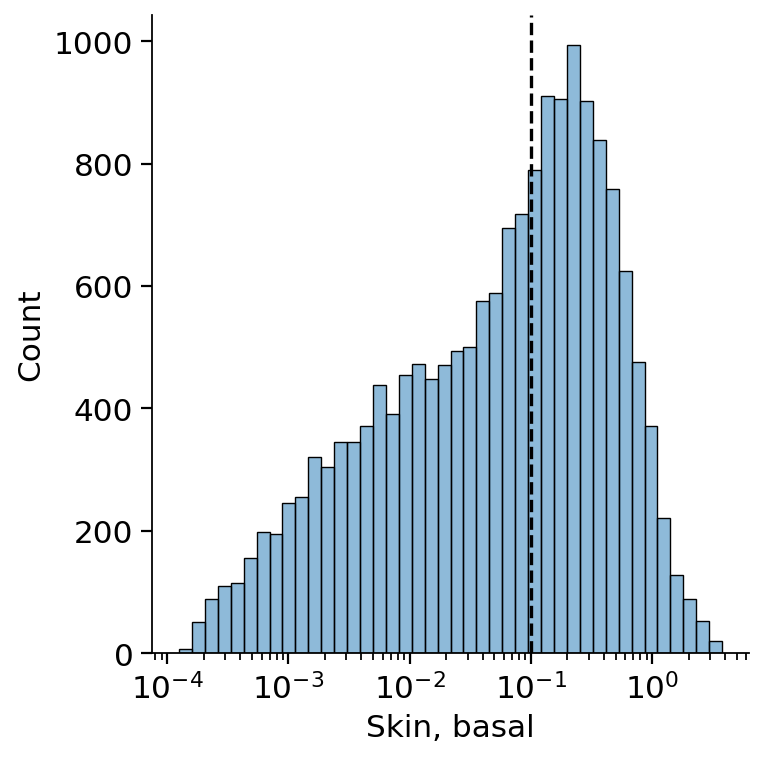

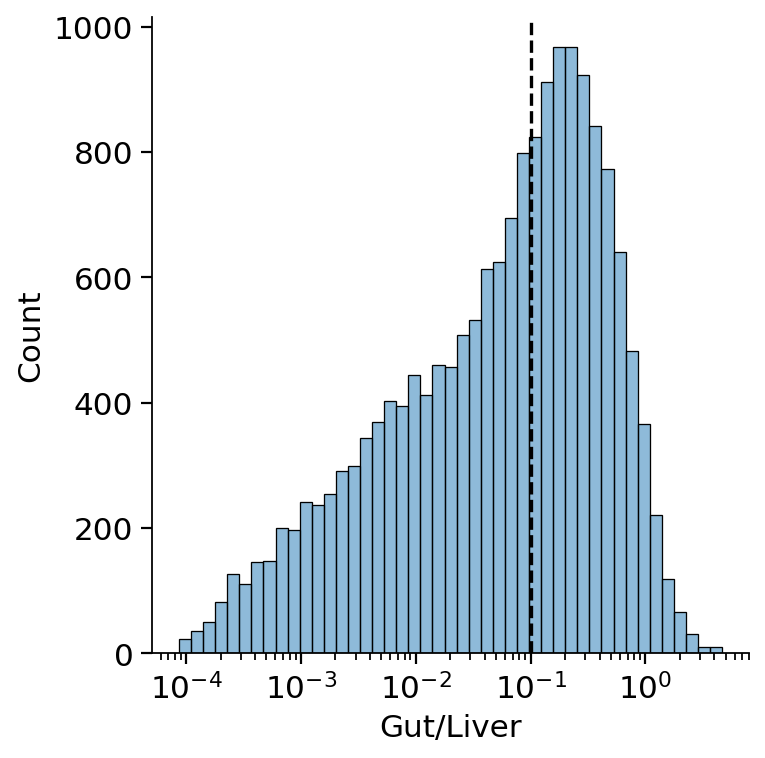

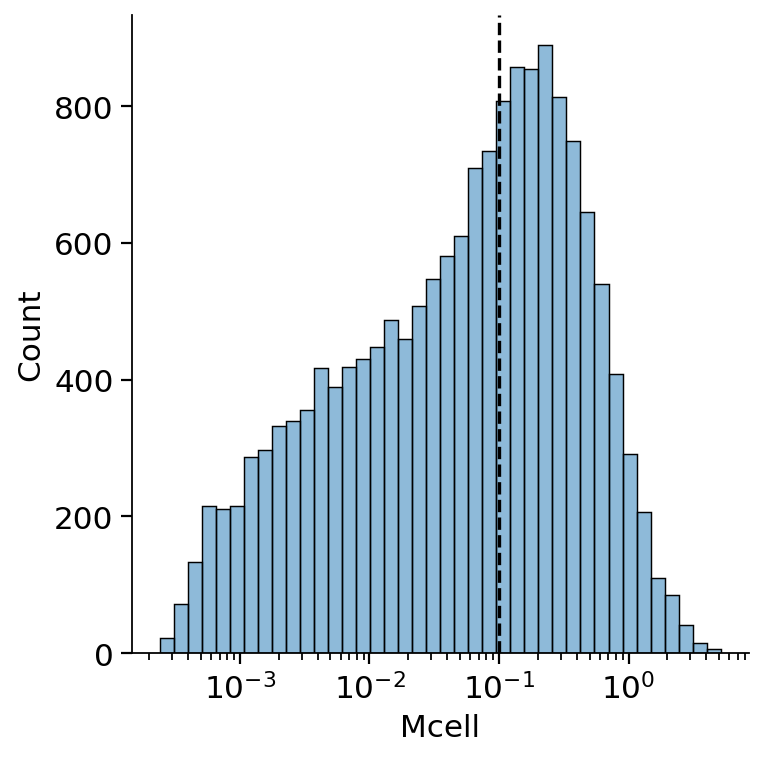

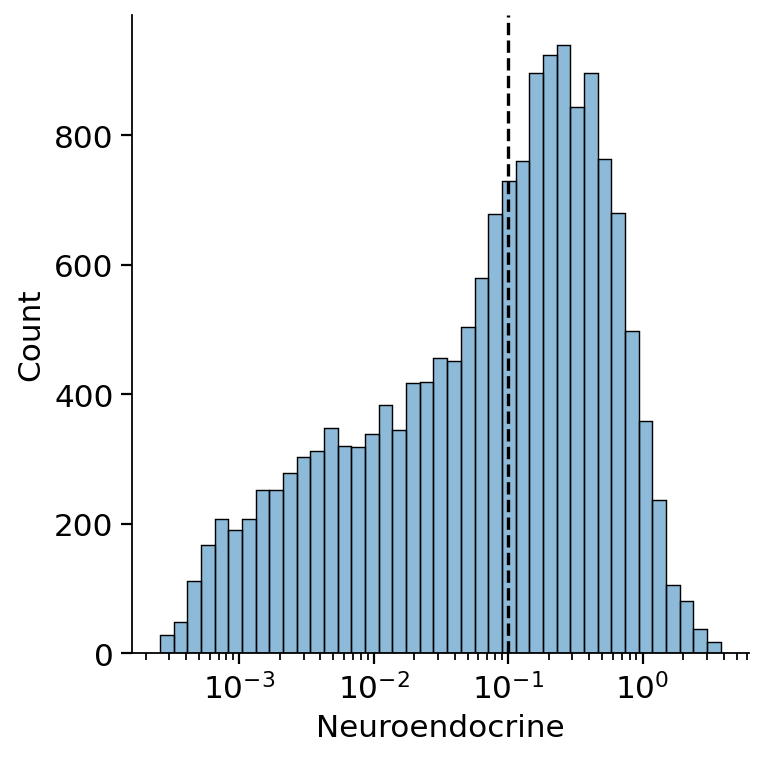

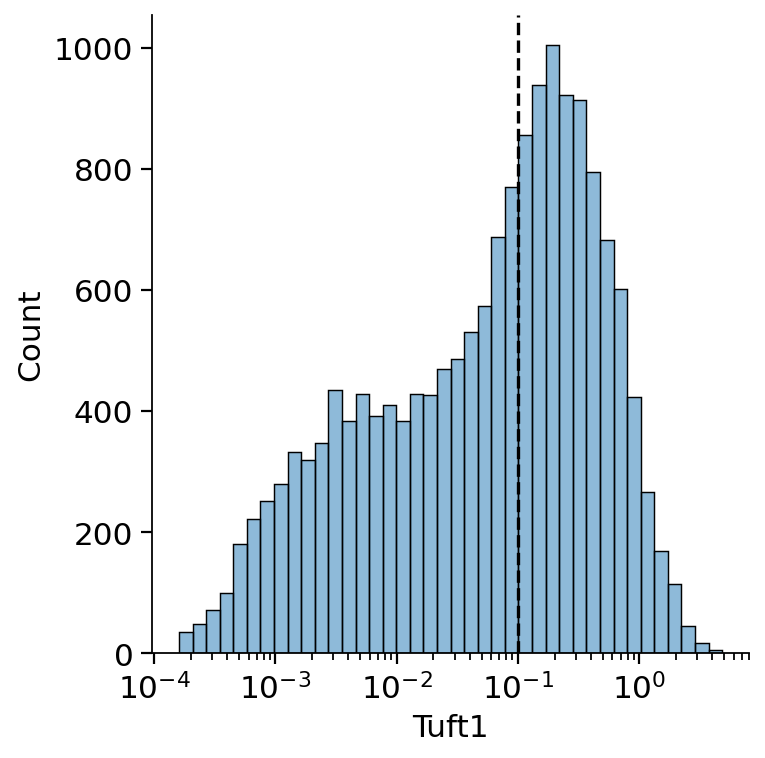

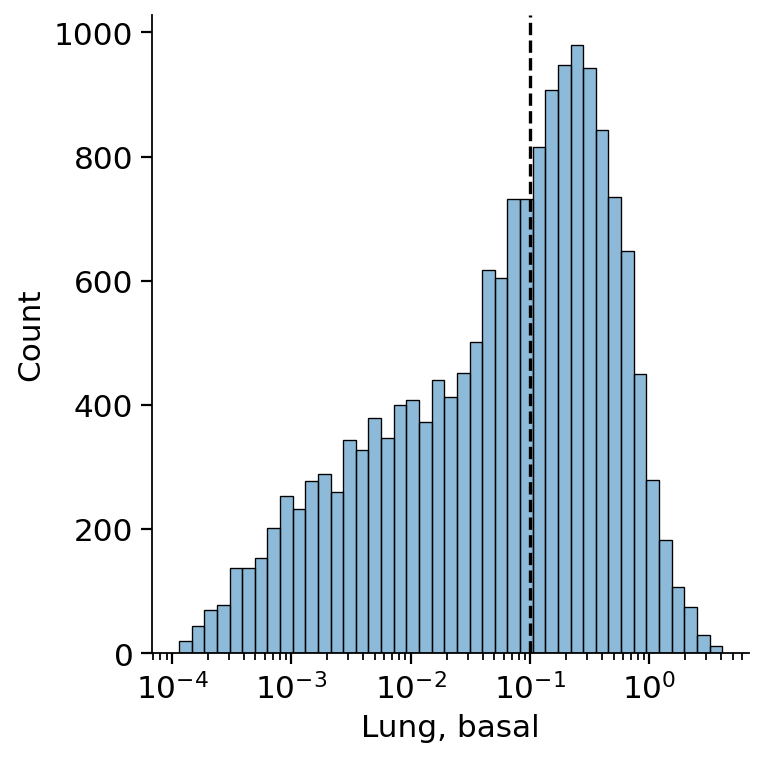

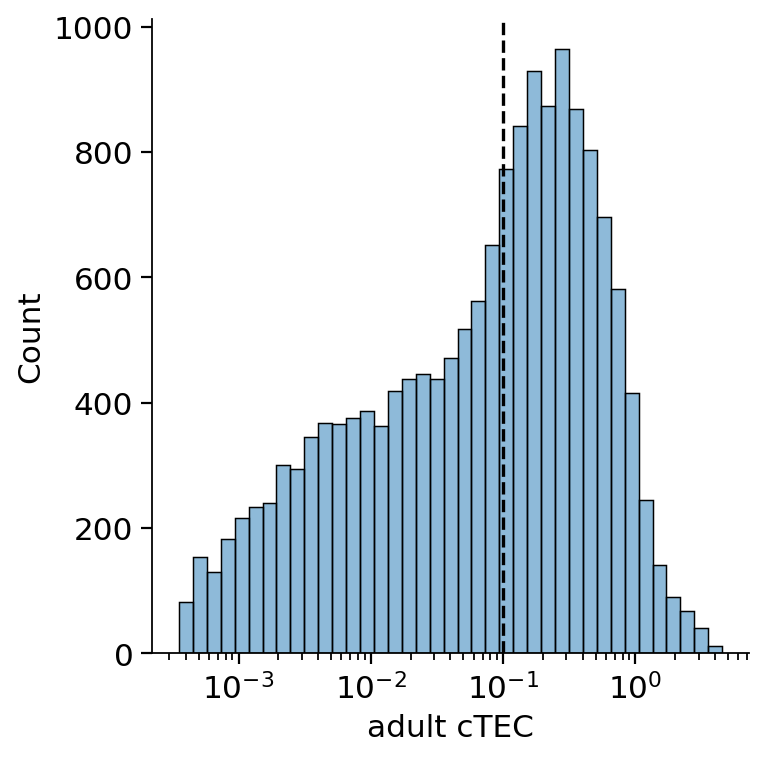

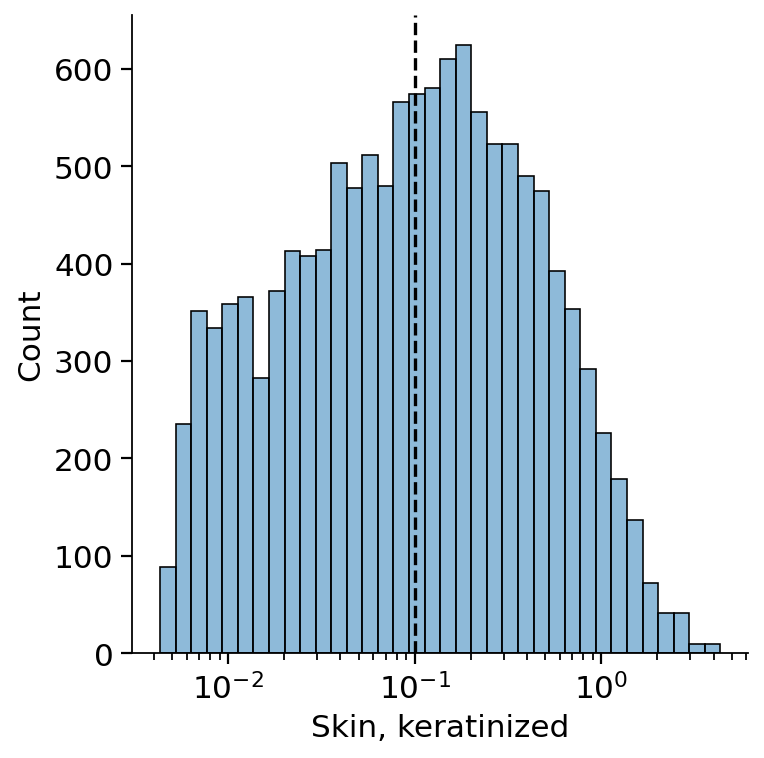

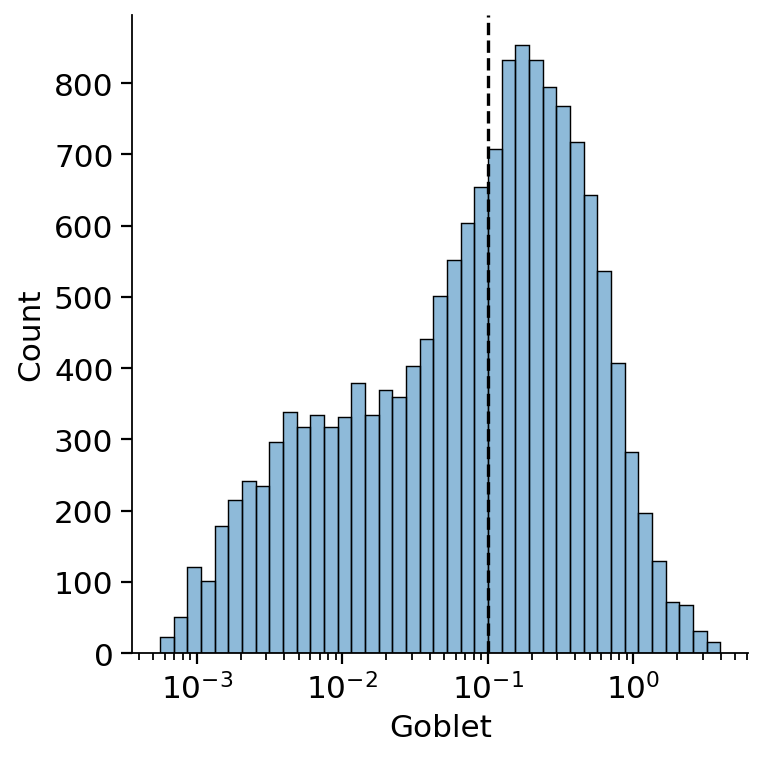

In [12]:
for cell_type in adata.obs.majority_voting.unique():
    sns.displot(exprs.T[cell_type], log_scale=True, kde=True)
    plt.axvline(x=0.1, color="black", linestyle="--")
    plt.show()

In [57]:
exprs = pd.DataFrame(adata.layers["log1p"].todense(), index=adata.obs_names)
exprs = exprs > 0.001
exprs = pd.DataFrame(exprs.sum(axis=1))
exprs["cell_type"] = adata.obs.majority_voting
exprs["genotype"] = adata.obs.genotype

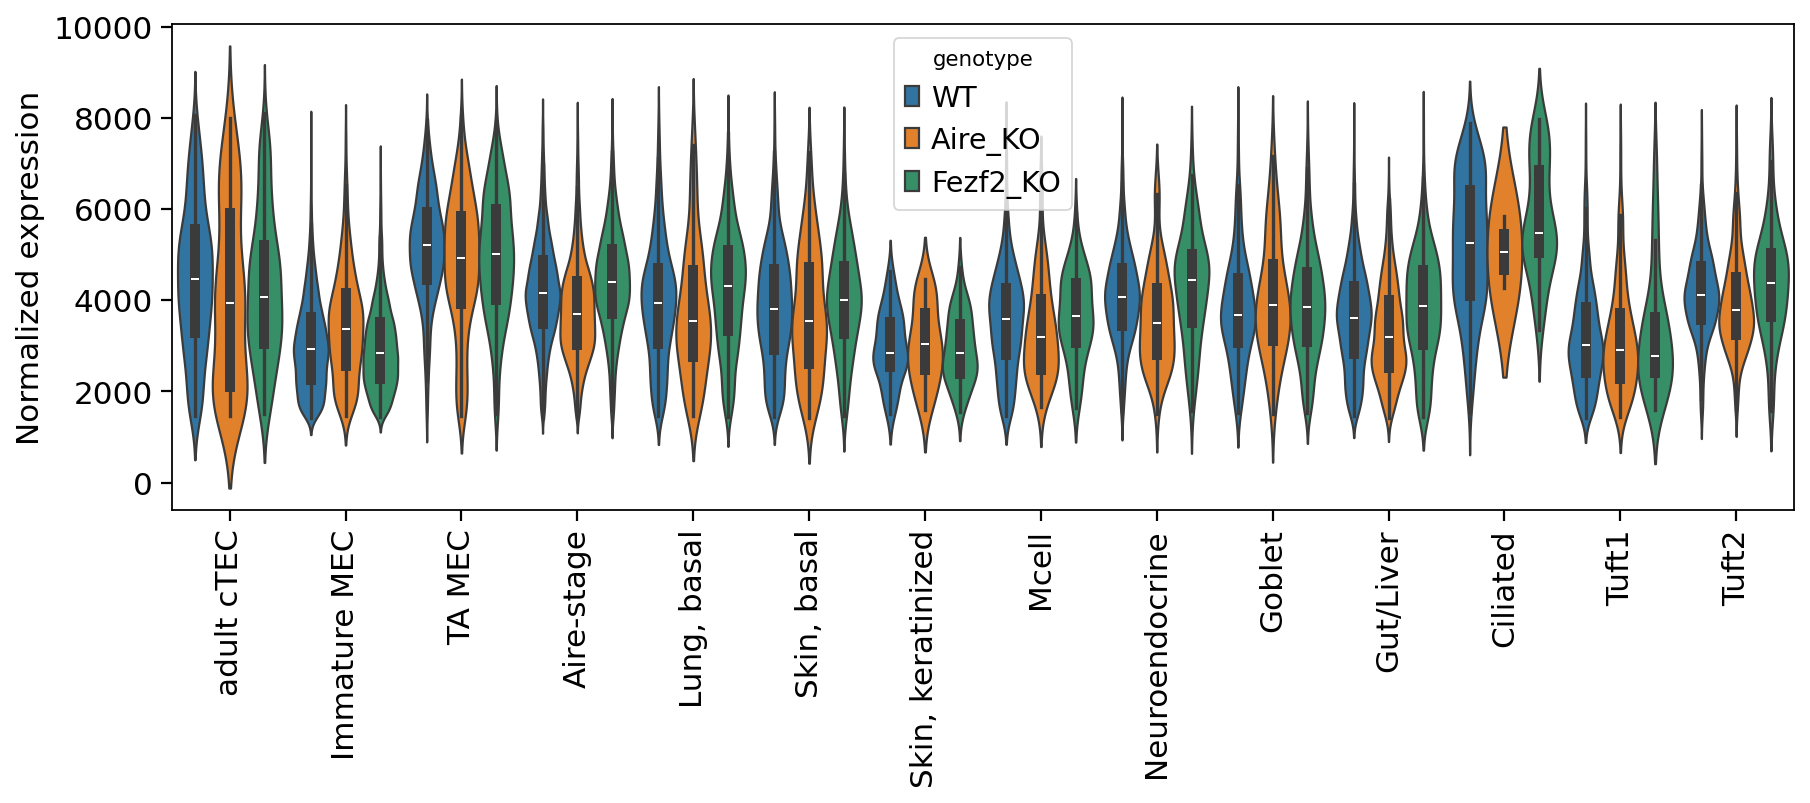

In [58]:
plt.figure(figsize=(13,4))
sns.violinplot(
    exprs,
    x="cell_type",
    y=0,
    hue="genotype",
    density_norm='width',
    width=0.9,
    hue_order=["WT", "Aire_KO", "Fezf2_KO"],
    order=["adult cTEC", "Immature MEC", "TA MEC", "Aire-stage", "Lung, basal",
           "Skin, basal", "Skin, keratinized", "Mcell", "Neuroendocrine", "Goblet",
           "Gut/Liver", "Ciliated", "Tuft1", "Tuft2"]
)
plt.xlabel("")
plt.ylabel("Normalized expression")
plt.xticks(rotation=90)
# plt.ylim(1000, 16000)
plt.show()

# Cell x gene epithelial cells

In [10]:
cell_x_gene_exprs = np.load(f"{processedDataPath}cell_x_gene_atlas/expression/cell_x_gene_atlas_expression.npy")
genes = pd.read_csv(f"{processedDataPath}cell_x_gene_atlas/expression/keep_genes.csv")["feature_name"]
cells = pd.read_csv(f"{processedDataPath}cell_x_gene_atlas/expression/obs_names.csv")['0']
metadata = pd.read_csv(f"{processedDataPath}cell_x_gene_atlas/expression/cell_metadata.csv", index_col=0)
cell_x_gene_exprs = pd.DataFrame(cell_x_gene_exprs, columns=genes)

In [17]:
cell_x_gene_exprs["cell_type"] = metadata.cell_type.values

In [18]:
cell_x_gene_exprs = cell_x_gene_exprs[cell_x_gene_exprs.cell_type.str.contains("epithelial")]
del cell_x_gene_exprs["cell_type"]
cell_x_gene_exprs = cell_x_gene_exprs >= 0.1
cell_x_gene_exprs = pd.DataFrame(cell_x_gene_exprs.sum(axis=1))

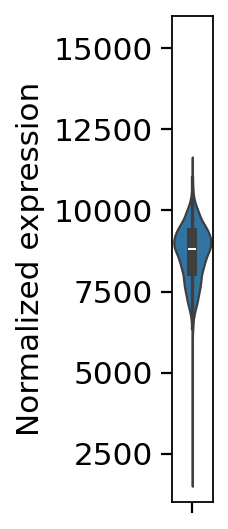

In [19]:
plt.figure(figsize=(0.33,4))
sns.violinplot(
    cell_x_gene_exprs,
    y=0,
    density_norm='width',
    width=0.9,
)
plt.ylim(1000, 16000)
plt.xlabel("")
plt.ylabel("Normalized expression")
plt.xticks(rotation=90)
plt.show()